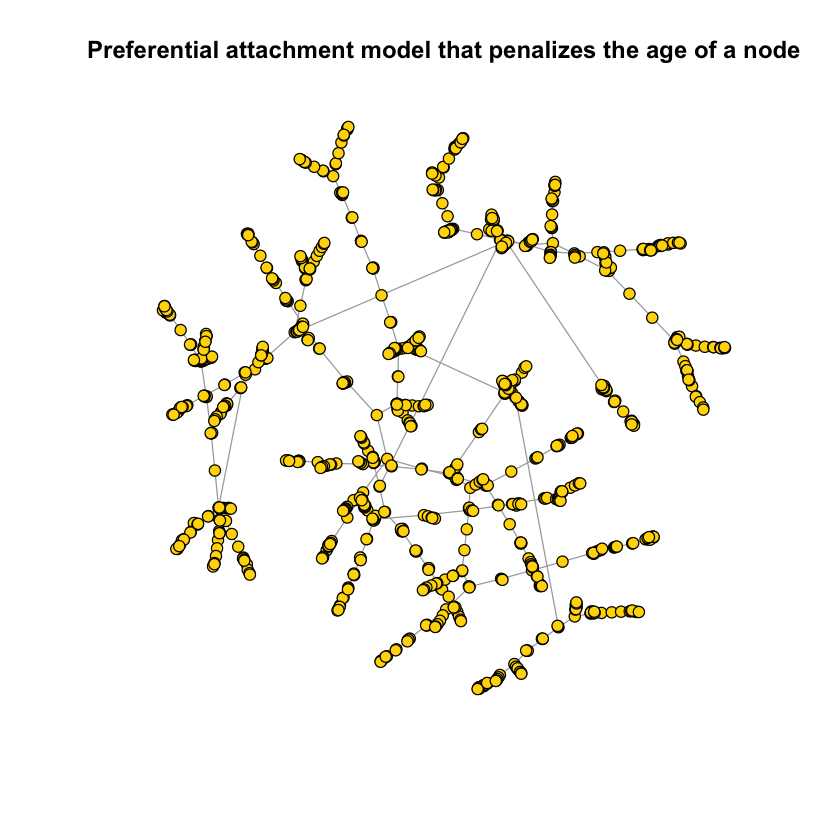

[1] "Slope of the plot is  -3.61540004492111"


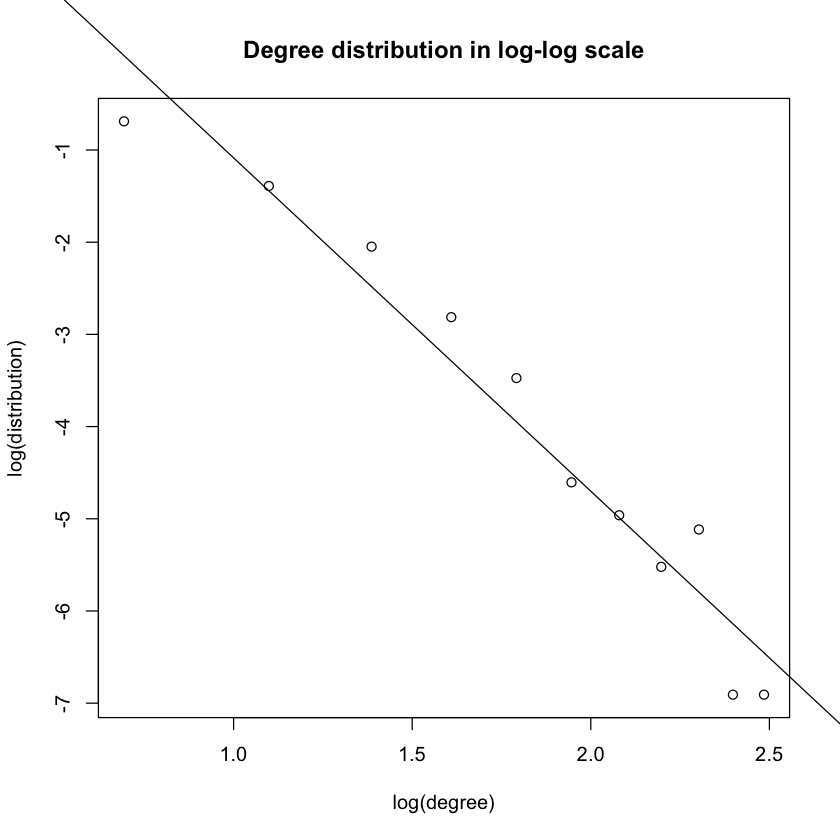

In [22]:
library(igraph)
library(ggplot2)

# Modified preferential attachment model that penalizes the age of a node

g = sample_pa_age(n = 1000, pa.exp = 1, ,m = 1, aging.exp = -1, zero.deg.appeal = 1, 
                  zero.age.appeal = 0, deg.coef = 1, age.coef = 1, aging.bin = 1000, directed = FALSE)

plot(main = "Preferential attachment model that penalizes the age of a node", g, vertex.color="gold", 
     vertex.size = 4, vertex.label = "")

log_degree = log(seq(1:length(degree.distribution(g))))
log_distribution = log(degree.distribution(g))

index = which(!is.infinite(log_distribution), arr.ind=TRUE)
log_degree = log_degree[index]
log_distribution = log_distribution[index]

plot(main = "Degree distribution in log-log scale", log_degree, 
     log_distribution, abline(lm(log_distribution ~ log_degree)), xlab = "log(degree)",ylab = "log(distribution)")

print(paste("Slope of the plot is ", cov(log_degree, log_distribution) / var(log_degree)))

[1] 0.9338738

IGRAPH clustering fast greedy, groups: 34, mod: 0.93
+ groups:
  $`1`
   [1]  63  65  70  71  72  82  94  95  96 100 112 113 123 173 191 204 247 250
  [19] 251 290 292 299 301 324 429 460 535 576 613 652 658 677 685 692 694 696
  [37] 707 761 780 936 944 949 951 959 968 995
  
  $`2`
   [1] 171 172 176 178 188 190 195 218 220 226 228 233 239 266 275 476 506 507
  [19] 509 526 550 553 633 638 641 643 646 647 671 676 697 809 811 812 821 956
  [37] 961 975 977 978 982 983 984 991
  
  + ... omitted several groups/vertices


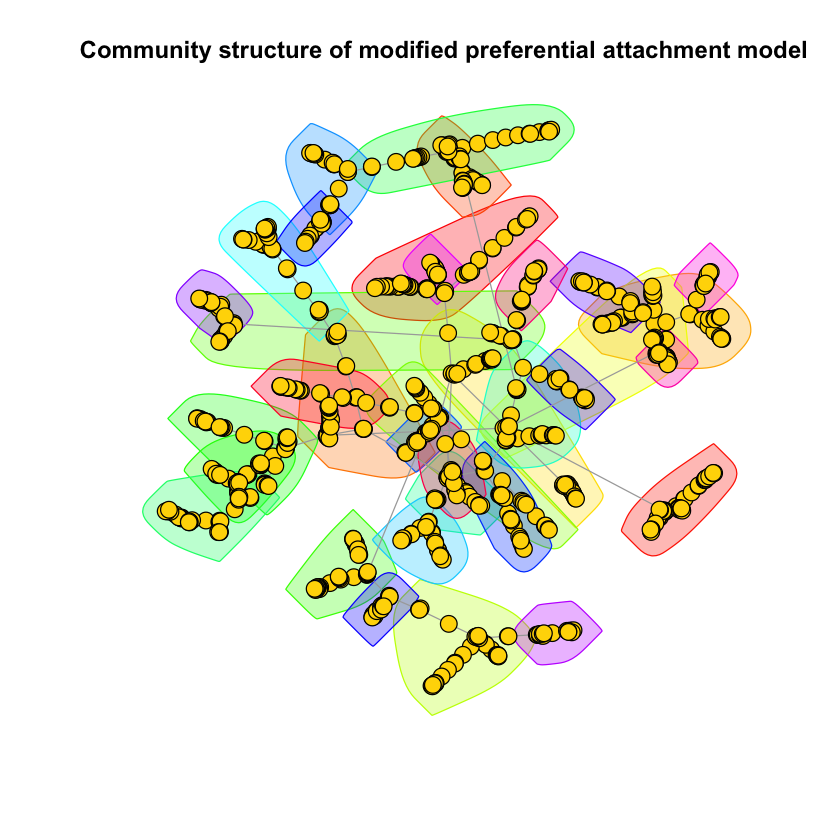

In [15]:
community <- cluster_fast_greedy(g)
modularity(community)
print(community)
plot(main = "Community structure of modified preferential attachment model", g, mark.groups = groups(community), 
     vertex.color = "gold", vertex.size = 6, vertex.label = "")